## On souhaite simuler un opérateur logique 'Non-xor' 

### Generer des cas d'ecole  1 ou 0

In [1]:
import numpy as np 
import random
import pandas as pd

In [9]:
# Le XOR
print(bool(1) != bool(0))
print(bool(1) != bool(1))
print(bool(0) != bool(0))
print(bool(0) != bool(1))
print('---------')
# Le non XOR
print(not(bool(1) != bool(0)))
print(not(bool(1) != bool(1)))
print(not(bool(0) != bool(0)))
print(not(bool(0) != bool(1)))



True
False
False
True
---------
False
True
True
False


### Construction des données d apprentissage


#### Cas simples: 0 ou 1

In [2]:
x1 = [random.choice([0.0, 1.0])   for x in range(30)]
x2 =  [random.choice([0.0, 1.0])   for x in range(30)]

In [3]:
print(x1)

[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


### détermination des etiquettes 0 ou 1

In [10]:
y_cas_general = zip(x1, x2)
y_general = [0 if bool(x[0]) != bool(x[1])  else 1  for x in y_cas_general  ]

### introduction de 'bruit' dans les données

In [11]:
ecart = list(range(6))
print(ecart)

[0, 1, 2, 3, 4, 5]


### Création d'un deuxieme jeu de données: les entrants sont pertubés mais le resultats doit rester le même

In [12]:
# x3 = [0 + (random.choice(ecart) / 10.0) for x ]
y_cas_general = zip(x1, x2)
x_fading = []
for (nx0,nx1) in y_cas_general :
    if nx0 == 0:
        nx0 += (random.choice(ecart) / 10.0)
    else:
        nx0 -= (random.choice(ecart) / 10.0) 
    if nx1 == 0:
        nx1 += (random.choice(ecart) / 10.0)
    else:
        nx1 -= (random.choice(ecart) / 10.0) 
    x_fading.append((nx0, nx1))
y_fading = y_general


### Création d'un datagramme qu'il faudra 'retourner' c'est à dire le transposer

In [13]:
dt = pd.DataFrame([x1, x2, y_general])
print(dt.shape)
print(dt.head())

(3, 30)
    0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  ...  1.0  0.0  1.0  1.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  0.0  1.0   
2  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0  1.0   

    24   25   26   27   28   29  
0  1.0  1.0  1.0  0.0  0.0  0.0  
1  1.0  1.0  1.0  0.0  1.0  0.0  
2  1.0  1.0  1.0  1.0  0.0  1.0  

[3 rows x 30 columns]


### Fabrication d'un 2eme dataframe pour les données brouillées

In [15]:
x0_fadingok = [x0 for x0,_ in x_fading]
x1_fadingok = [x1 for _,x1 in x_fading]

              
dt2 = pd.DataFrame([x0_fadingok, x1_fadingok, y_general])
print(dt2.head())

    0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  0.5  0.0  0.2  0.9  0.6  0.6  0.3  0.0  1.0  1.0  ...  0.6  0.3  0.6  0.6   
1  0.1  0.5  0.5  0.4  0.3  0.2  0.8  0.5  0.7  0.5  ...  0.1  0.7  0.1  0.5   
2  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0  1.0   

    24   25   26   27   28   29  
0  0.7  0.8  0.9  0.1  0.3  0.5  
1  0.8  1.0  0.6  0.2  0.8  0.0  
2  1.0  1.0  1.0  1.0  0.0  1.0  

[3 rows x 30 columns]


### On concatene les deux dataframes

In [16]:
dtotal = pd.concat([dt,dt2], axis = 1)

In [17]:
dtotal.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.6,0.3,0.6,0.6,0.7,0.8,0.9,0.1,0.3,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.1,0.7,0.1,0.5,0.8,1.0,0.6,0.2,0.8,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [18]:
import matplotlib.pyplot as plt

### On permutte les colonnes et les iignes: transposition

In [19]:
dtotal= dtotal.transpose()
print(dtotal.head())

     0    1    2
0  0.0  0.0  1.0
1  0.0  0.0  1.0
2  0.0  0.0  1.0
3  1.0  0.0  0.0
4  1.0  0.0  0.0


### Création d'un filtre nommé

In [20]:
vrai = dtotal[2] == 1

### Decompte des 'faux' et 'vrais'

In [21]:
vrai.value_counts()

True     32
False    28
Name: 2, dtype: int64

### Visualisation des données

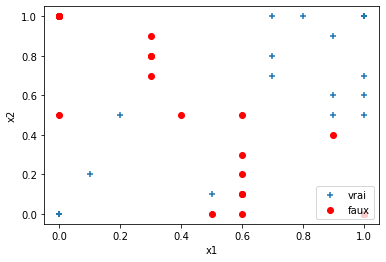

In [22]:
plt.scatter(dtotal[0][vrai],dtotal[1][vrai], marker='+' )
plt.scatter(dtotal[0][~vrai],dtotal[1][~vrai], marker='o' , color ='r' )
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['vrai', 'faux'], loc = 'lower right')


### Utisation d'un perceptron

In [23]:
from sklearn.linear_model import Perceptron

### Export du dataframe vers des objets numpy

In [24]:
X_ = dtotal[[0,1]].to_numpy()
y = dtotal[2].to_numpy()
print(len(y))

60


### Entrainement du modèle

In [25]:
pr = Perceptron(verbose=1)
pr.fit(X_, y )

-- Epoch 1
Norm: 1.91, NNZs: 2, Bias: 0.000000, T: 60, Avg. loss: 0.430333
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 2, Bias: 0.000000, T: 120, Avg. loss: 0.320167
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.94, NNZs: 2, Bias: -1.000000, T: 180, Avg. loss: 0.444500
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.42, NNZs: 2, Bias: -1.000000, T: 240, Avg. loss: 0.449333
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.44, NNZs: 2, Bias: -1.000000, T: 300, Avg. loss: 0.472667
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.63, NNZs: 2, Bias: -1.000000, T: 360, Avg. loss: 0.506000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.92, NNZs: 2, Bias: -1.000000, T: 420, Avg. loss: 0.475667
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(verbose=1)

### Affiche les poids calculés

In [26]:
print(pr.coef_, pr.intercept_)

[[0.3 1.9]] [-1.]


### Construction des cas de test

In [27]:
tests  = np.array([[0,0], [1,0], [0,1] , [1, 1]])
y_theorique = np.array([1, 0, 0, 1])

### Score de notre modèle

In [28]:
pr.score(tests, y_theorique)

0.5

### Prévisions

In [29]:
pr.predict(tests)

array([0., 0., 1., 1.])

In [24]:
pr.decision_function(tests)

array([-6. , -1.8, -2.2,  2. ])

In [25]:
pr.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 1,
 'warm_start': False}